In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = [1,2,3,4,5,6,7]

In [3]:
directory1 = 'D:/IST/5 ano/2 semestre/Tese/fluidic-sensor/data/human trials'
directory2 = 'D:/IST/5 ano/2 semestre/Tese/human trial stuff/human trials 2'
directoryH = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/High force raspberry/TPU/Reference'
directoryM = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/Medium force raspberry/TPU/Reference'
directoryL = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/Low force raspberry/TPU/Reference'

In [4]:
directory = directoryL

In [5]:
human_trials_r = []
human_trials_l = []
all_times = []
for i in range(1,6):
    # for i, trial in enumerate(os.listdir(directory))
    file_name = directory+'/human trial'+str(i)+'.txt'
    with open(file_name, 'r+') as f:
        trial_r = []
        trial_l = []
        time = []
        i = 0
        while True:
            line = f.readline()
            if not line:
                break
            if i > 3:
                if float(line[6:14]) > 0.6:
                    time.append(float(line[6:14]))
                    trial_r.append(float(line[15:35]))
                    trial_l.append(float(line[36::]))
            i += 1
    all_times.append(time)
    human_trials_r.append(trial_r)
    human_trials_l.append(trial_l)


In [6]:
file = open('human trial 7g - time series.txt', 'w+')
for timeseries in all_times:
    for t in timeseries:
        file.write('       %f \n' % t)
    file.write('\n\n\n\n\n')
file.close()

In [14]:
file = open('human trials 7g - pressure.txt', 'w+')
for trial in human_trials_r:
    for t in trial:
        file.write('       %f \n' % t)
    file.write('\n\n\n\n\n')
file.close()

In [15]:
file = open('human trials 7g - pulling.txt', 'w+')
for trial in human_trials_l:
    for t in trial:
        file.write('       %f \n' % t)
    file.write('\n\n\n\n\n')
file.close()

In [7]:
for i, trial in enumerate(human_trials_r):
    # plt.plot(all_times[i], trial)
    plt.plot(range(len(trial)), trial)


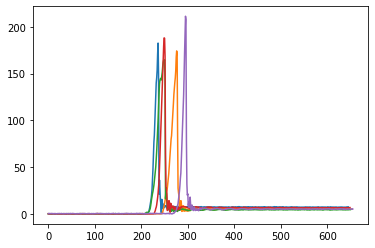

In [8]:
for i, trial in enumerate(human_trials_l):
    plt.plot(range(len(trial)), trial)


## Aligning with when the raspberry is off the stem 

In [9]:
human_trials = human_trials_r

In [10]:
lengths = []
off_stem = []
begin_pull = []
for trial in human_trials:
    lengths.append(len(trial))
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    off_stem.append(dif.index(min(dif)))

for trial in human_trials_l:
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    begin_pull.append([dif.index(max(dif))-1,dif.index(min(dif))+1])


In [11]:
begin_pull2 = []
for trial in human_trials_l:
    pull = [0, 0]
    flag = False
    for i,value in enumerate(trial):
        if value > 50 and not flag:
            pull[0] = i-1
            flag = True
        elif value < 50 and flag:
            pull[1] = i+1
            break
    begin_pull2.append(pull)
        

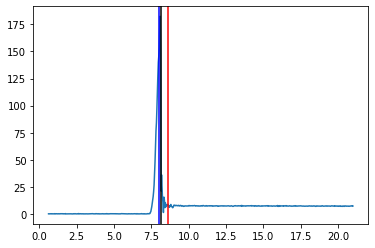

In [17]:
i = 0
plt.plot(all_times[i], human_trials_l[i])
# only one line may be specified; full height
plt.axvline(x = all_times[i][begin_pull[i][0]], color = 'b', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]], color = 'k', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]+begin_pull2[i][1]-begin_pull2[i][0]], color = 'r', label = 'axvline - full height')

In [18]:
i = 0
plt.plot(all_times[i], human_trials_r[i])
# only one line may be specified; full height
plt.axvline(x = all_times[i][begin_pull[i][0]], color = 'b', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]], color = 'k', label = 'axvline - full height')
plt.axvline(x = all_times[i][begin_pull[i][1]+begin_pull2[i][1]-begin_pull2[i][0]], color = 'r', label = 'axvline - full height')

: 

In [14]:
max_val = max(off_stem)
new_human_trials = []
new_trials_loadcell = []
for i, trial in enumerate(human_trials):
    if i != off_stem.index(max_val):
        extra = np.array([0]*(max_val-off_stem[i]))
        new_human_trials.append(np.append(extra, trial))
        new_trials_loadcell.append(np.append(extra, human_trials_l[i]))


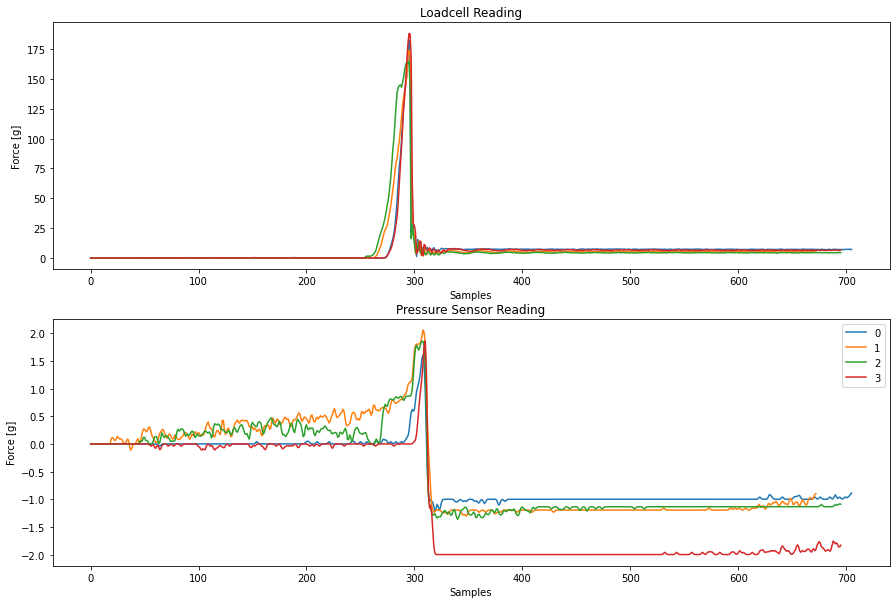

In [15]:
minimum = 0
saved = 0
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for i, trial in enumerate(new_human_trials):
    axs[1].plot(range(len(trial)), trial, label=str(i))
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Samples")
    axs[1].set_title("Pressure Sensor Reading")
    axs[1].legend(loc="upper right")

    axs[0].plot(range(len(new_trials_loadcell[i])), new_trials_loadcell[i])
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Samples")
    axs[0].set_title("Loadcell Reading")
    newminimum = trial[-1]
    if newminimum < minimum:
        saved = i
        minimum = newminimum

Text(0, 0.5, 'Raspberry twin measurement')

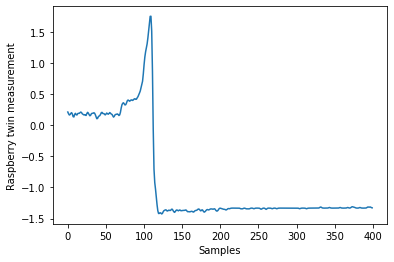

In [16]:
longest = 0
length = 0
picking_trials = new_human_trials
for i, trial in enumerate(picking_trials):
    if len(trial) > length:
        longest = i
        length = len(trial)

for i, trial in enumerate(picking_trials):
    picking_trials[i] = np.array(trial)
    if i != longest:
        picking_trials[i] = np.append(picking_trials[i], [0]*(length-len(trial)))

trials_array = np.array([picking_trials])[0]
mean = np.mean(trials_array, axis=0)
plt.plot(range(0, mean[200:600].shape[0]), mean[200:600])
plt.xlabel('Samples')
plt.ylabel('Raspberry twin measurement')

In [82]:
a = [6.7578958655375345, 0, 6.8911978318491265, 7.155803065184841, 7.82822201340457]
a.count(0)

1

In [17]:
print(np.max(mean))

4.8781275


In [84]:
mean_str =[]
# name of csv file
filename = "referenceVHFString.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean.tolist()[200:500])
    csvwriter.writerows(mean_str)

## Aligning with the beginning of the grasp

In [22]:
picking = []
for trial in human_trials:
    picking.append(np.where(np.floor(np.abs(trial)) > 0)[0][0])

In [23]:
max(picking)

688

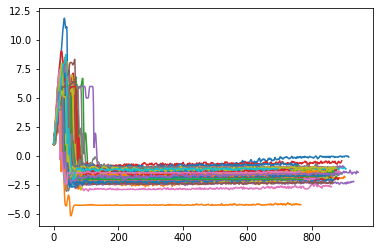

In [24]:
picking_trials = []
for i, trial in enumerate(human_trials):
    picking_trials.append(trial[picking[i]::])
    plt.plot(range(0, len(trial)-picking[i]), picking_trials[i])
    


Text(0, 0.5, 'Raspberry twin measurement')

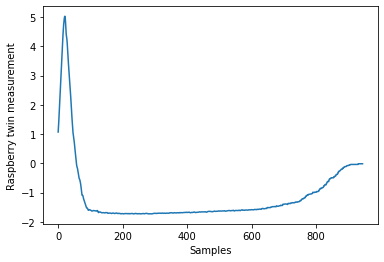

In [26]:
longest = 0
length = 0
for i, trial in enumerate(picking_trials):
    if len(trial) > length:
        longest = i
        length = len(trial)

for i, trial in enumerate(picking_trials):
    picking_trials[i] = np.array(trial)
    if i != longest:
        picking_trials[i] = np.append(picking_trials[i], [0]*(length-len(trial)))

trials_array = np.array([picking_trials])[0]
mean = np.mean(trials_array, axis=0)
plt.plot(range(0, mean.shape[0]), mean)
plt.xlabel('Samples')
plt.ylabel('Raspberry twin measurement')

In [20]:
mean_str =[]
saved = 0
# name of csv file
filename = "human_harvest_raspberry_4gWOBendy.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in human_trials_r[saved])#[0:400])
    csvwriter.writerows(mean_str)

In [21]:
mean_str =[]
# name of csv file
filename = "human_harvest_loadcell_4gWOBendy.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in human_trials_l[saved])#[0:400])
    csvwriter.writerows(mean_str)

In [14]:
mean_str =[]
# name of csv file
filename = "average_human_harvest_train.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean_train.tolist())
    csvwriter.writerows(mean_str)

mean_str =[]
# name of csv file
filename = "average_human_harvest_test.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean_test.tolist())
    csvwriter.writerows(mean_str)

In [5]:
harvest_ref = []
rows = []
filename = "average human harvest.csv"
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

harvest_ref = [float(x) for x in rows[0]]
np.array(harvest_ref).shape[0]

283